# NYC Bike Data Analysis, Regression Prediction and Exploration


## **Abstract**

We utilized data from [NYC Citi Bike](https://citibikenyc.com/system-data), one of the largest station-based bike-sharing systems in the United States. Our analysis includes data from the year 2018 for data analysis and regression prediction, while data from 2018, 2019, and 2020 were used for data exploration through the CNN model.

The dataset from each year comprises more than 900 stations and 14,000 bikes, totaling over 17 million observed bike rides. The primary objective of this dataset is to optimize City Bike's operations and make bike sharing more appealing.

This article is structured into three sections. We began with a concise analysis and visualization of the data, with a specific focus on constructing regression models. Following that, we transitioned into the exploratory phase of the CNN model, utilizing data from 2018, 2019, and 2020 to delve deeper into the insights and patterns.





##### **Section 1 Introduction + Data Analysis and Visualization**

We preprocessed data before clustering and generating interactive images for basic data analysis.

##### **Section 2 the Prediction Challenge**

We continued to work with the dataset, incorporating weather data. Based on XGBoost, we built three models:
- "Regression for Departures"
- "Regression for Arrivals"
- "Regression for Demand of the Bike"
  
All these models achieved a R-squared value greater than 0.7.

##### **Section 3 Exploratory Component**

We expanded the results of the "Regression for Demand of the Bike" model and created three visualizations from Section 1. 

The focus was predicting the daily probability of bike demands for each cluster, with the aim of optimizing bike distribution. 

We collected data from 2019 and 2020, and plotted bike borrowing and returning patterns over 1095 days. 

Hence we constructed a CNN model based on a pre-trained 'ResNet-50 model'. The final model performed well with a test loss of 0.001168.

#### **Note** 
Each section's "Brief Introduction" corresponding to the local numbered code blocks.


## 1 .  Introduction + Data Analysis and Visualization

#### **Brief Introduction**


**1.1 Processing data before clustering (codes in the the data_utils.py)**
1. Transform date to datetime

2. Coping with NAN     

3. Adding the duration minutes/ the time interval/ month/start_day/end_day in dat base

4. Adding weekday/ starttime y_m_d/ one-hot usertype

**1.2 Visualization**
1. Gender Distribution with Different Usertypes

2. Riding Period in the Dataset

3. The top 10 Stations with the most daily bike traffic in August v.s. daily cycling volumn（the volume in August is the largerst）

  




##### ***NOTE:*** *Information about the Module 'data_utils'*
1. The module 'data_utils' includes the methods of processing the data (before clustering and after clustering) and the methods of processing images (Exploratory component)

2. When you want to run this script, please download. It is in the same folder with this .ipynb file

3. The format of picture 3 is **.html** and it is interactive. But it is a screen shot in this part. You can download [*raw document*](https://github.com/si-tong-chen/NYC-Bike-Data-Analysis-Regression-Prediction-and-Exploration/tree/main/interactive_graph)


### **Conclusion**


In this section, we conducted initial data processing, including time format conversion, NaN value handling, extraction of potentially useful information, and preliminary exploratory analysis with interactive visualizations, all aimed at aiding subsequent modeling and analysis.

Our macro-level analysis resulted in Figures 1 and 2. Figure 1 revealed that male cyclists are more than females since 2018, especially most of riders were subscriber. The result suggested a need to boost female ridership and conversion rate of non-subscribers. Figure 2 indicates that most rides last 0-30 minutes, showing potential optimization of bike station placements for future supply.

Narrow down to the data of August. In August, we have the most customers over the year. We analyzed daily trends at the top 10 stations and showed the result with an interactive graph. Notably, the lowest ridership appeared on the 11th and 13th, and the highest was on the 25th. This visualization laid the ground for our next exploration of daily rental patterns based on borrow and return data.




### 1.1 Processing Data Before Clustering (Codes in the the data_utils.py)

In [ ]:
#processing data before clustering includes
df = pd.read_csv('Trips_2018.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
data_processor = data_utils.processingData(df)
df= data_processor.processingData_before_cluster()
df['distance'] = df.apply(
    lambda row: data_utils.get_distance(row['start_station_latitude'], row['start_station_longitude'], 
                             row['end_station_latitude'], row['end_station_longitude']), axis=1)
# there are some wrong distance in here, due to wrong latitude and longitude, we delete them
print('The precentage of NAN of distacne:',df.isna().sum()[-1]/len(df)) 
df.dropna(inplace=True)
print('The precentage of NAN of distacne after discarding:',df.isna().sum()[-1]/len(df))
with open('data.pickle', 'wb') as f:
    pickle.dump(df, f)
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

### 1.2 Visualization

####  1.2.1 Plot about 'Gender Distribution with Different Usertype'

In [ ]:
group1=[]
group2=[]
for i in range(3):
    group1.append(len(data.groupby(['usertype', 'gender']).get_group((1, i)))) #1 is 'Subscriber'
    group2.append(len(data.groupby(['usertype', 'gender']).get_group((0, i)))) #0 is 'Customer'
categories = ['Unkown', 'Male', 'Female']
source = ColumnDataSource(data={'categories': categories, 'group1': group1, 'group2': group2})
output_notebook()
p = figure(x_range=categories, plot_height=350, title="Gender Distribution with Different Usertype", toolbar_location=None, tools="")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
p.vbar(x='categories', top='group1', width=0.4, source=source, color=colors[0], legend_label="Subscriber")
p.vbar(x='categories', top='group2', width=0.4, source=source, color=colors[1], legend_label="Customer")
hover = HoverTool()
hover.tooltips = [("Category", "@categories"), ("Subscriber", "@group1"), ("Customer", "@group2")]
p.add_tools(hover)
p.xgrid.grid_line_color = None
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.legend.title = "Groups"
show(p)

|                    |
|:-------------------:|
| <p align="center"><img src="image/gender dis.png" alt="Image" width="500" height="333"></p> 

#### 1.2.2 Riding Period in the Dataset

In [ ]:
categories = ['(0, 30]', '(30, 60]', '(60, 90]', '(90, 120]', '(120, 150]','(150,180]','(180, 325227]']
values = data['duration_bin'].value_counts(sort = False)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=values, y=categories, palette="viridis")
plt.xlabel("Values")
plt.ylabel("Duration")
plt.title("Riding Period")
plt.show()

|                    |
|:-------------------:|
| <p align="center"><img src="image/ridingperiod.png" alt="Image" width="500" height="333"></p> 

#### 1.2.3 Plots of the top 10 stations with the most daily bike traffic in August vs the daily cycling volume（the volume in August is the largest）

In [5]:
data_August = data[data.month == 8]

new_data_August= data_August.start_station_id.value_counts().reset_index()
new_data_August.columns = ['start_station_id', 'Count']
start_station_id_10 = new_data_August.start_station_id[0:10]
table = pd.DataFrame()
for i in range(10):
    a= []
    for j in range(31):
        a.append(len(data_August.groupby(['start_day', 'start_station_id']).get_group((j+1,start_station_id_10[i]))))

    b = pd.DataFrame(a)  
    table =  pd.concat([table,b],axis = 1)
    
names = ['s519','s497','s426','s402','s514','s435','s285','s281','s459','s3225']
table.set_axis(names,axis='columns',inplace=True)
date = np.arange(1, 32)
table.insert(0, 'date', date)
# calculate the sum of duration per day in August 
list_sum = []
for i in range(31):
    list_sum.append(data_August.groupby('start_day').get_group(i+1)['duration_mintues'].sum())
list_sum = pd.DataFrame(list_sum)
list_sum.insert(0, 'date', date)
list_sum.set_axis(['date','line_values'],axis='columns',inplace=True)

dates = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
        '20','21','22','23','24','25','26','27','28','29','30','31']
source_df = ColumnDataSource(table)
source_df1 = ColumnDataSource(list_sum)
p= figure(title=" plot about The top 10 stations with the most daily bike traffic in August vs the total duration time per day",x_range = dates,plot_width = 1200, plot_height = 600)
bar ={} 
for i in range(10):
    bar[i] = p.vbar(x='date',top=names[i], source= source_df,muted_alpha=0.05, muted = True,color=cividis(10)[i]) 
p.y_range = Range1d(start=0, end=800)
p.yaxis.axis_label = "Bar Chart Values"
p.extra_y_ranges = {"right_y": Range1d(start=600000, end=1400000)}
p.add_layout(LinearAxis(y_range_name="right_y", axis_label="Line Chart Values"), 'right')
line = p.line(x='date', y='line_values', source=source_df1, line_color="blue", line_width=2,y_range_name="right_y")    
items = [] 
for i in range(10):
    items.append((names[i], [bar[i]]))
items.append(("Line", [line]))
legend = Legend(items=items)
p.add_layout(legend, 'left')
p.legend.click_policy="mute" 
show(p)

|                    |
|:-------------------:|
| <p align="center"><img src="image/top10.png" alt="Image" width="700" height="333"></p> 

## 2. Prediction Challenge



#### **Brief Introduction**


**2.1 Finding the Best K and Clustering the Data**

1. We replace GPU with CPU to calculate in order to find the best number of k using elbow method

2. We do not put the coding of gpu in here, but we have a plot to show how we confirmed the best k that in this folder

3. We find that the best K is ***62***  and cluster number is K=62

**2.2 Processing Data After Clustering (in the data_utils.py)**
1. adding hour/ is_weekend/ is_holiday/ season/

2. **Creating the Real Label for Model**

3. Setting label: m_d_h(month_day_hour)


**2.3 Weather Data**
1. 'TAvg'is average temperature, 'TMAX' is max temperature, 'TMIN' is min temperature

2. 'DPAvg' is the average dew point,

3. 'HumidityAvg' is the average humidity,

4. 'WindSpeedAvg'is average windspeed, 'Precipitation ' is precipitation

5. 'SNWD' is snow depth, 'SNOW' is snow

6. 'lagged_1_temperature' is temperature lagged by 1 time step

7. 'lagged_1_Precipitation' is precipitation lagged by 1-time step

8. 'lagged_1_SNWD'and 'lagged_2_SNWD' are snow depth by 1-time step and 2-time step respectively


**2.4 Building the Model,Find tuning and Evaluating**
1. We only use the **XGBoost** model in here, use R-Squared to evaluate model

2. The workflow of model will be shown in another part

2. R2 for regression departures model is ***0.7123***, for regression arrivals model is ***0.728***, for regression demand of bike model is ***0,848***

2. Using random search to achieve parameters tunning to get the best parameters (We don't show in this scripts,we put this moduel with this script in the same zip)





### **Modeling Process**

##### **For building both the "Regression for Departures" and "Regression for Arrivals" models**

**Step 1:** Generating Real Labels

Initially, we create real labels based on clusters and time intervals. For departures, this involves starting time intervals, while for arrivals, it involves arrival time intervals. We categorize the data based on these two dimensions: clusters and hourly time intervals. Subsequently, we map the generated data back to the original dataset.

**Step 2:** Data Splitting

The data is splitted according to the requirement, with data from January to October served as the training dataset, and data from November and December served as the testing dataset.

**Step 3:** Feature Selection

The selection of features is based on subjective judgement and relevance to the problem. Notably, weather data is identified as particularly crucial. In cases where weather data is not included, the R-squared value hovers around 0.21.

**Step 4:** Model Training and Evaluation

##### **For establishing the "Regression for Demand of the Bike" model**

**Step 1:**

Initially, we predict the demands separately based on the "Regression for Departures" and "Regression for Arrivals" models.
Based on these predictions, we calculate our true labels by subtracting the departure predictions from the arrival predictions.

**Step 2:**

In the next step, we eliminate duplicate data to prevent data leakage. This is essential because we are dealing with hourly time intervals, and duplicates may occur when the starting station, ending station, start time interval, and end time interval are all the same. To address this, we use these four criteria as the basis for deduplication.

**Step 3:**

The following steps involve feature selection, model training, model evaluation, and model usage.
Regarding model usage, we extract data from December 31, 2018, to predict data for January 1, 2019。












### **Conclusion**
All of our models have an R-squared (R2) value exceeding 0.6, making them suitable for prediction. The R2 values for each model are as follows:

- R2 for the "Regression for Departures" model is 0.712.

- R2 for the "Regression for Arrivals" model is 0.728.

- R2 for the "Regression for Demand of Bike" model is 0.848.

However, there is still room for improvement based on R2 and Mean Squared Error (MSE). We will continue to search for variables that influence the models, aiming to enhance their performance.



### 2.1 Find the Best K and Clustering Data

In [ ]:
features = ['start_station_latitude','start_station_longitude']
data_cluster = data[features]
## normalization
scaler = MinMaxScaler()
data_cluster_normal = scaler.fit_transform(data_cluster)

In [ ]:
# b is the result from the calculation in GPU
b= [56622.365427364246, 47979.53530339518, 41787.08163688338, 37262.813299243055, 32557.68493654768, 30042.964783099244, 27313.618662419856, 25613.678781443632, 23369.14418800023,
    21453.62601248043, 21056.42707001579, 19781.43223720497, 17722.870738302798, 16873.663431918005, 15877.313851389628, 14751.164241093124, 14624.53120721362, 13628.058945102224, 
    13029.322320268751, 12470.10997345978, 12146.477918915672, 11371.763087782265, 11072.75020001915, 10659.188421675202, 10257.819083374443, 9776.44986720446, 9551.28567401801,
    9300.288724443395, 9041.82575622006, 8855.013577532161, 8359.871413040855, 8127.161704164806, 8074.445366856517, 7648.709323108851, 7465.018762810978, 6944.859803586931, 
    6743.664171278853,6695.356291343014, 6361.057949021775,6275.974078681567, 6168.285359188403, 6009.835980760789, 5873.42660082735, 5658.299224367697, 5493.570047399132, 
    5468.760266932088, 5319.879776503464, 5056.601929305876, 4974.3564858223035, 4830.6601633176215, 4693.688228033944, 4579.152046144666, 4466.886369260277, 4343.915386149615, 
    4201.46131964157, 4173.927890139498, 4064.871340561522,3993.424602274575, 3848.756282618467, 3782.423184101248, 3793.103666830548]
    
a = np.arange(20,203,3)
plt.plot(a, b,linewidth=2.5)
plt.scatter(a[16], b[16], color='red', label='K = 62')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

|                    |
|:-------------------:|
| <p align="center"><img src="image/clusterK.png" alt="Image" width="500" height="333"></p> 

In [ ]:
## using kmeans and K = 62
kmeans = KMeans(n_clusters=62,max_iter=10000, init="k-means++", tol=1e-6)
result = kmeans.fit(data_cluster_normal )
label = kmeans.labels_
data["cluster_label"] = label 
data_cluster = data

### 2.2 Processing Data After Cluster

In [ ]:
# processing data after clustering 
data_processor= data_utils.processingData(df)
df=data_processor.processingData_after_cluster()

### 2.3 Adding weather data 

In [ ]:
## merge weather situation and data_cluster (SNWD is the snow depth)
weather = pd.read_csv('weather_combine.csv')
weather = weather[['DATE','TAvg','TMAX','TMIN','DPAvg','HumidityAvg','WindSpeedAvg','Precipitation ','SNWD','SNOW']]
weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y/%m/%d')
weather = weather.rename(columns={'DATE': 'startime_y_m_d'})
weather['lagged_1_temperature'] = np.insert(np.array(weather['TAvg']), 0, 15.35)[:-1]
weather['lagged_1_Precipitation'] = np.insert(np.array(weather['Precipitation ']),0,0)[:-1]
weather['lagged_1_SNWD'] = np.insert(np.array(weather['SNWD']),0,0)[:-1]
weather['lagged_2_SNWD'] = np.insert(np.array(weather['lagged_1_SNWD']),0,0)[:-1]
model_data = pd.merge(data_cluster, weather, on=['startime_y_m_d'], how='left')
with open('/Users/sitongchen/Desktop/42577 Introduction to Business Analytics/Project' + '/model_data.pickle', 'wb') as f:
    pickle.dump(model_data, f)
with open('model_data_0.719.pickle', 'rb') as f:
    model_data = pickle.load(f)

### 2.4 Building the Model and Evaluating

#### 2.4.1 Regression for Departures

##### **Workflow of building model**
1. Split the data into train and test.

    * Data from Jan to Oct 2018 is train data
   
    * Data from Nov to Dec 2018 is test data


2. Exact the Features

3. Normalization, train model and evaluate model
4. Applying to the whole data for predicting the demand of bike riding

**Note:** Other models have the same workflow expect regression for demand of bike (It is shown in its part)



##### 2.4.1.1 Split the Data into Train and Test 

In [4]:
# split the data into train data and test data. data from Jan to Oct is train data, others are test data
# id max cluster 
idmax = model_data['cluster_label'].value_counts().idxmax()
model_data_filter=model_data[model_data['cluster_label']==idmax]
train_data =model_data_filter[~((model_data_filter['month'] == 12) | (model_data_filter['month'] == 11))]
test_data = model_data_filter[((model_data_filter['month'] == 12) | (model_data_filter['month'] == 11))]

##### 2.4.1.2 Exact the Features

In [5]:
# exact the features 
features  = ['is_weekend','is_holiday','starttime_hour','start_day','month','season','TAvg',
             'lagged_1_temperature','Precipitation ','SNWD','SNOW','lagged_1_SNWD','lagged_2_SNWD','distance']
X_train = train_data[features]
y_train = train_data['count_start']
X_test = test_data[features]
y_test = test_data['count_start']

##### 2.4.1.3 Normalization, Train the Model and Evaluate the Model 

In [6]:
## normalization 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## build the model 
model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_jobs=-1,
            n_estimators=160,
            max_depth=7,
            subsample=0.5,
            learning_rate=0.1,
            gamma=0,
            colsample_bytree=0.3,
            random_state=2023, max_features=None, alpha=0.8)
model.fit(X_train, y_train)

XGBRegressor(alpha=0.8, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_features=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=160,
             n_jobs=-1, ...)

In [7]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score:', r2)
print('MSE:',mse)

R2 score: 0.7123421530560063
MSE: 1113.7110536560992


##### 2.4.1.4 Applying to the Whole Data for Predicting the Demand of Bike Riding 

In [8]:
## predict the departures about all data 
model_data_departures = model_data[features]
model_data_departures = scaler.transform(model_data_departures)
model_data['predict_departures']= model.predict(model_data_departures)

#### 2.4.2 Regression for Arrivals
##### 2.4.2.1 Exact the Features

In [ ]:

# exact the features
features = ['is_weekend','is_holiday','stoptime_hour','end_day','month','season','TAvg',
                      'lagged_1_temperature','Precipitation ','distance',
                      'lagged_1_Precipitation','SNOW','SNWD','lagged_1_SNWD','lagged_2_SNWD']
X_train = train_data[features]
y_train = train_data['count_end']

X_test = test_data[features]
y_test = test_data['count_end']

##### 2.4.2.2 Normalization, Train the Model and Evalute the Model

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_jobs=-1,
            n_estimators=94,
            max_depth=6,
            subsample=0.9,
            learning_rate=0.18999999999999995,
            gamma=0,
            colsample_bytree=0.3,
            random_state=2023, max_features=None, alpha=0.8)
model.fit(X_train, y_train)

XGBRegressor(alpha=0.8, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.18999999999999995,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_features=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=94,
             n_jobs=-1, ...)

In [11]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score:', r2)
print('MSE:',mse)

R2 score: 0.7275668270153284
MSE: 1060.0692645472266


#### 2.4.2.3 Applying to the Whole Data for Predicting the Demand of Bike Riding 

In [12]:
## predict the arrivals about all data 
model_data_arrivals= model_data[features]
model_data_arrivals = scaler.transform(model_data_arrivals)
model_data['predict_arrivals']= model.predict(model_data_arrivals)

#### 2.4.3 Regression for Demand of the Bike

##### **Workflow of Building the Model**
1. Processing Data 
    - Using arrivals prediction minus departures prediction

    - Get the ride of the duplicate value because the time interval is hour
    
    - Merge the data for training 
    
2. Exact the features
3. Split the data into train and test.

    * Using sklearn to pick up randomly
   
    * 80% for train, 20% for test


4. Normalizaiton, train the model and evaluate the model
5. Prdeict the riding volume, using 2018-12-31 to predict riding volume on 2019-1-1

##### 2.4.3.1 Processing Data

In [13]:
## calculate the demand (arrivals - departures)
model_data['demand_bike']= round(model_data.predict_arrivals-model_data.predict_departures)

## get the ride of the duplicate value because the time interval is hour (arrivals - departures in each hour)
model_data_filter= model_data.drop_duplicates(subset=['start_station_id', 'end_station_id','start_m_d_h','end_m_d_h'])

## merge the data for training 
group_modle_data_fliter=model_data_filter.groupby(['start_day','cluster_label']) # riding volumn per day in each cluster
total_value = group_modle_data_fliter['demand_bike'].sum().reset_index()
model_data = pd.merge(model_data, total_value, on=['start_day','cluster_label'], how='left')
model_data = model_data.rename(columns={'demand_bike_x': 'demand_bike_day','demand_bike_y': 'demand_bike_cluster'})
with open('modeldata_predict_bike_daydemand.pickle', 'wb') as f:
    pickle.dump(model_data, f)
with open('modeldata_predict_bike_daydemand.pickle', 'rb') as f:
    model_data = pickle.load(f)

In [10]:
model_data.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,...,SNWD,SNOW,lagged_1_temperature,lagged_1_Precipitation,lagged_1_SNWD,lagged_2_SNWD,predict_departures,predict_arrivals,demand_bike_day,demand_bike_cluster
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,...,0.0,0.0,15.35,0.0,0.0,0.0,6.029134,7.259035,1.0,13710.0
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,...,0.0,0.0,15.35,0.0,0.0,0.0,9.943530,12.388288,2.0,13710.0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,...,0.0,0.0,15.35,0.0,0.0,0.0,13.863530,14.310578,0.0,13710.0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,...,0.0,0.0,15.35,0.0,0.0,0.0,10.936340,12.634552,2.0,13710.0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,...,0.0,0.0,15.35,0.0,0.0,0.0,45.507633,62.834053,17.0,13710.0


##### 2.4.3.2 Exact the Features

In [18]:

##extract features
features = ['start_station_id','end_station_id','usertype','gender','duration_mintues','month','weekday','distance',
            'starttime_hour','stoptime_hour','is_weekend','is_holiday','season','TAvg','DPAvg','HumidityAvg',
            'WindSpeedAvg','Precipitation ','SNWD','SNOW','lagged_1_temperature','lagged_1_Precipitation','lagged_1_SNWD','lagged_2_SNWD']
           
X = model_data[features]
y = model_data['demand_bike_cluster']

##### 2.4.3.3 Split the Data into Train and Test 

In [19]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 2.4.3.4 Normalization, Train the Model, and Evaluate the Model 

In [20]:
# training model 
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_jobs=-1,
            n_estimators=157,
            max_depth=7,
            subsample=0.5,
            learning_rate=0.2899999999999999,
            gamma=0,
            colsample_bytree=0.6,
            random_state=2023, max_features=None, alpha=0.8)
model.fit(X_train, y_train)

XGBRegressor(alpha=0.8, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2899999999999999,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_features=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=157,
             n_jobs=-1, ...)

In [21]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.8477975880277733


##### 2.4.3.5 Predict the Riding Volume, Using 2018-12-31 to Predict Riding Volume on 2019-1-1

In [ ]:
## extact the all the data on 2018-12-31 to predict riding volumn on 2019-1-1
model_data_1231 = model_data[model_data['startime_y_m_d'] == '2018-12-31']
model_1231 = model_data_1231[features]
X_test = scaler.transform(model_1231)
y_pred = model.predict(X_test)

model_data_1231["pred"] = y_pred

pred_1_1 = pd.DataFrame(round(model_data_1231.groupby('cluster_label')['pred'].mean()))

pred_1_1.to_csv('pred_01_01.csv', index=False)

In [12]:
pd.read_csv('pred_01_01.csv')

,pred
0,-284.0
1,-3186.0
2,-7095.0
3,-735.0
4,746.0
...,...
57,2126.0
58,-9061.0
59,669.0
60,-4947.0


## 3. Exploratory Component



#### **Explanation:**

As we can see the numbers in the result above. In reality, the demands won't be exactly satisfied by every station. Like the result in pred_1_1, but we cannot always collect the exact number of bikes for the next day due to many reasons like shortage of time, and shortage of bikes. How can we improve our predictions?

And in visualization part, we talk about picture 3 in the 1.2.3 gives us inspirations. Based on the number of clusters, 62, we measure by day, and we can get the probability of each cluster requiring the number of bikes. 


#### **Specific Method**

**Step 1:** Collect data from 2019 and 2020, with the aim of data augmentation to prevent overfitting.

**Step 2:** Use data from 2018 to 2020 to create daily bike borrowing and return graphs (from start station to end station). Assign different colors based on the station's cluster affiliation and adjust the line thickness based on the number of occurrences for each start station to end station pair (thicker lines for higher occurrence). An example image is shown in section 3.2.1.

**Step 3:** Utilize a pre-trained 'ResNet-50 model' and retain the weights of the pre-trained model, and then connect it to 3 hidden layers and a softmax output layer. We selected Mean Squared Error (MSE) Loss as the loss function, and employed the Adam optimizer for model training. Input data are graphs and output is the possibility of 62 clusters. 

**step 4:** Batch size = 1, and training data one by one in chronological order. Specific results and evaluations are provided later.


#### **Brief Introduction**

**3.1 Collecting and Processing the 2019 and 2020 Dataset** 

1. Collect 2019 and 2020 and make them have the same format as 2018

2. Using module in 'data_utils.py' to process with data. We have introduced it in **1.1** and **2.1**


**3.2 Draw Directed Graph**

1. Calculate the labels using in CNN (details about label in 3.2.1)

2. Using package **networkx** to draw the rent-lending images per day. So we get the total images (the exact number is 1095)



**3.3 Processing the Images**

1. The size of the original images is very large, we need to resize them to 224*224.

2. There are four channels in the images RGBA, we need to get rid of the Alpha channel.

**3.4 Build the CNN model**
1. Split the data into train (Jan 2018 to Oct 2020), validation (Nov 2020), and test data (Dec 2020)

2. Normalization and convert into tensor 

3. Using pre-train model, choose optimizer and criterion (learning_rate: 0.0001, decay :0.01)

4. test forward propagation

**3.5 Train Model**

1. Get the train loss and validation loss


**3.6 Test the Model and Evaluate the Model**

1. Get the test loss

#### **Conclusion**
|<img src="image/train_loss.png" alt="Image 1" width="400" height="200"> | <img src="image/validation_loss.png" alt="Image 2" width="400" height="200">|

The final converged *training loss* is 0.00098, and the final converged *validation loss* is 0.001. The *test loss* is 0.00116. 

A low training loss indicates that the model performs very well on the training set, fitting the data effectively. A low validation loss means the model also performs well on unseen data, demonstrating good generalization ability. Moreover, the similarity between validation loss and training loss typically suggests that the model is not overfitting. The test loss is slightly higher than the training and validation losses, but the difference is not significant.

The conclusion is that the model performs well and is sufficiently stable. However, there is a certain probability of underfitting (even though we used the 'ResNet-50 model' as a pre-trained model).

For subsequent experiments: using more sample data, improving data quality, and refining the custom connection layers should be considered to check for the risk of underfitting.

### 3.1  Collecting and Processing the 2019 and 2020 Dataset 
#### 3.1.1 Read the Data

In [ ]:
file_paths_2019 = [
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202001-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202002-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202003-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202004-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202005-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202006-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202007-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202008-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202009-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202010-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2019/202011-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2019/202012-citibike-tripdata.csv']
file_paths_2020 = [
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202001-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202002-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202003-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202004-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202005-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202006-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202007-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202008-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202009-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202010-citibike-tripdata.csv',
    '/Users/chensitong/python3.9.11/42577BAProject/database/2020/202011-citibike-tripdata.csv','/Users/chensitong/python3.9.11/42577BAProject/database/2020/202012-citibike-tripdata.csv']
result_2019 = pd.concat([pd.read_csv(file) for file in file_paths_2019], ignore_index=True)
result_2020 = pd.concat([pd.read_csv(file) for file in file_paths_2020], ignore_index=True)

#### 3.1.2 Processing the Data 

In [ ]:
# processing 2019 and 2020 data 
def processing_data_same_2018(result_2019):
    # processing data before cluster
    data_processor = data_utils.processingData(result_2019)
    df_2019= data_processor.processingData_before_cluster()
    # kmeans cluster 62
    features = ['start_station_latitude','start_station_longitude']
    data_cluster = df_2019[features]
    label = data_utils.kmeans_62_data(data_cluster)
    df_2019["cluster_label"] = label
    # processing data after cluster
    data_processor= data_utils.processingData(df_2019)
    df_2019=data_processor.processingData_after_cluster()
    return df_2019

df_2019 = processing_data_same_2018(result_2019)
df_2020 = processing_data_same_2018(result_2020)

with open('/Users/chensitong/python3.9.11/42577BAProject/database/2019_model_data.pickle', 'wb') as f:
    pickle.dump(df_2019, f)
with open('/Users/chensitong/python3.9.11/42577BAProject/database/2020_model_data.pickle', 'wb') as f:
    pickle.dump(df_2020, f)

### 3.2 Draw Directed Graph
 **Information**:

1. Here, we just show how to draw the Directed Graph on year 2018. Drawing images on 2019 and 2020 is the same.

2. And we calculate the labels. By grouping the data based on clusters and departure days at the stations, as well as clusters and arrival days at the stations, we obtain the actual demand for bikes. Then, by subtracting the demand from the departure days from the demand on arrival days for each cluster, and dividing it by the total demand, we obtain the probability of bike demand for each of the 62 clusters on each day of the year

**About the Graph**:
1. Each connection 'start_station_id', 'end_station_id' has a color

2. According to the number of each connection, each connection has a different weight. (The thickness of the lines is different)

3. We use **' nx.kamada_kawai_layout'** to draw graphs

#### 3.2.1 Calculate the Labels Using in CNN

In [ ]:
## calculate the real demand of bike per day 
with open('/Users/chensitong/python3.9.11/42577BAProject/database/model_data_0.719.pickle', 'rb') as f:
   df = pickle.load(f)

df['stop_y_m_d'] = df['stoptime'].dt.strftime('%Y-%m-%d')
df['start_y_m_d'] = df['starttime'].dt.strftime('%Y-%m-%d')
df1 = df.groupby(["cluster_label",'start_y_m_d']).size().reset_index()
df2 = df.groupby(["cluster_label",'stop_y_m_d']).size().reset_index()
df2 = df2.rename(columns={'stop_y_m_d': 'start_y_m_d'})
df3 = pd.merge(df1, df2, on=['start_y_m_d','cluster_label'], how='left')
df3['demand'] = df3['0_y']-df3['0_x']
df3['demand'] = df3['demand'].apply(lambda x: 0 if x > 0 else x) # demand is negative in this part,so turn positive into zero  
df3['demand'] = df3['demand'].apply(lambda x: x*-1) # turn negative into positive, making the demand is positive 
# get the probability of cluster per day 
# every day each cluster has each prosbility, so prob_cluster_365's shape is [365*62]
prob_cluster_365= []
for i in range(365):
    new=df3[df3['start_y_m_d']== df3['start_y_m_d'].unique()[i]]
    #in case there is no ride in the cluster, not every day has 62 clusters 
    if len(new)==62:
        a = [(np.array(new['demand'])[j]/ new['demand'].sum()) for j in range(62)]
    else:
        missing_numbers = set(range(62)) - set(new['cluster_label'])
        missing_df = pd.DataFrame({'cluster_label': list(missing_numbers)})
        new = pd.concat([new, missing_df])
        new= new.sort_values(by='cluster_label').reset_index(drop=True)
        new.fillna(0, inplace=True)
        a = [(np.array(new['demand'])[j]/ new['demand'].sum()) for j in range(62)]      
    prob_cluster_365 = prob_cluster_365 +[a]
with open('/work3/s230027/BA/2019_prob_cluster_365.pickle', 'wb') as f:
    pickle.dump(prob_cluster_365, f)

#### 3.2.1 Draw Directed Graph

In [ ]:
#dic for edge color reflection
edge_map = df[['start_station_id','end_station_id','cluster_label']].drop_duplicates(subset=['start_station_id','end_station_id'])
edge_color_all={}
for _, row in edge_map.iterrows():
    edge_color_all[(row['start_station_id'], row['end_station_id'])] = int(row['cluster_label'])
# dic for edge value 
from sklearn.preprocessing import MinMaxScaler
df_grap_testcount= df.groupby(['start_station_id','end_station_id']).size().reset_index()
scaler = MinMaxScaler()
value= scaler.fit_transform(np.array(df_grap_testcount[0]).reshape(-1,1))
df_grap_testcount[0] = value*30
edge_count_all={}
i = 0
for _, row in df_grap_testcount.iterrows():
    edge_count_all[(row['start_station_id'], row['end_station_id'])]=row[0]

In [ ]:
#draw directed graph
node_num_list,edge_num_list,density_list = [],[],[]
i = 0
output_folder = '/work3/s230027/BA/2019graph/'
for date in df['start_y_m_d'].unique():
    df_grap_test = df[df['start_y_m_d'] == date][['start_station_id','end_station_id']]
    df_grap_test_1 = df_grap_test
    edge_color,edge_count = data_utils.exact_dict(df_grap_test_1)
    # create the image
    plt.figure(figsize=(8, 8))
    G = nx.DiGraph() 
    G.add_nodes_from(df_grap_test_1['start_station_id'].unique())
    G.add_nodes_from(df_grap_test_1['end_station_id'].unique())
    for idx, row in df_grap_test_1.iterrows():
        G.add_edge(row['start_station_id'], row['end_station_id']) 
    node_num = G.number_of_nodes()
    edge_num = G.number_of_edges()
    density = nx.density(G)
    plt.figure(figsize=(45,30))  
    # color 
    cmap = plt.get_cmap('viridis', 62)
    # node_colors = [mcolors.to_hex(cmap(node_color[node])) for node in G.nodes()]
    edge_colors = [mcolors.to_hex(cmap(edge_color[edge])) for edge in G.edges()]
    # edge weight
    for edge, value in edge_count.items():
        G.add_edge(edge[0], edge[1], weight=value)
    # Get edge weights for setting edge widths
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G,pos = pos ,node_size=15 ,node_color = 'gray', alpha=0.5, width=edge_weights,edge_color =edge_colors)
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis('off')  
    #save pic
    filename = f'RLbike_graph_2019_{i+1}.png'
    file_path = os.path.join(output_folder, filename)
    plt.savefig(file_path, dpi=300, bbox_inches='tight', pad_inches=0) 
    node_num_list.append(node_num)
    edge_num_list.append(edge_num)
    density_list.append(density)
    print("have drawn:",i+1)
    i +=1

### 3.3 Processing the Images

##### **Processing the images**:
1. The size of the original images is very large, we need to resize them to 224*224.

2. There are four channels in the images RGBA, we need to get rid of the Alpha channel.

3. we just show how to deal with the images about 2018. Coping with 2019, and 2020 is the same.

In [3]:
image_paths = ['/work3/s230027/BA/2018graph/RLbike_graph_{}.png'.format(i) for i in range(1,366)]
print("Total Observations:\t", len(image_paths))
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")

Total Observations:	 365
Running GPU.


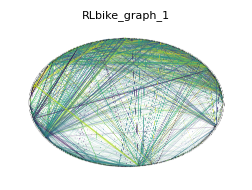

In [4]:
# Display the first image
plt.figure(figsize=(3, 3))
image = imread(image_paths[0])
plt.imshow(image, cmap='viridis')
plt.title('RLbike_graph_1',fontsize=8)
plt.axis('off')
plt.show()

In [5]:
#exam the number of channels
data_utils.exam_channels(image_paths[0])

The image has 4 channel(s).


In [9]:
## processing the data (resize and get rid of  Alpha channel)
output_folder = '/work3/s230027/BA/2018_graph_resize/'
image_processor = data_utils.ProcssingImage(image_paths, output_folder)
for idx in range(len(image_paths)):
    image_processor.process_image(idx)
#exam the number of channels again 
after_image_path = output_folder+'RLbike_graph_2018_1.png'
data_utils.exam_channels(after_image_path)

The image has 3 channel(s).


### 3.4 Build the CNN Model

#### 3.4.1 Split the Data into Train, Validation and Test Data 

##### **Information**

1. Train data is from Jan 2018 to Oct 2020 

2. Validation is are Nov 2020

3. Test data is Dec 2020

In [5]:
## Open all of the images
image_paths_2018 = ['/work3/s230027/BA/2018_graph_resize/RLbike_graph_2018_{}.png'.format(i) for i in range(1,366)]
image_paths_2019 = ['/work3/s230027/BA/2019_graph_resize/RLbike_graph_2019_{}.png'.format(i) for i in range(1,366)]
image_paths_2020 = ['/work3/s230027/BA/2020_graph_resize/RLbike_graph_2020_{}.png'.format(i) for i in range(1,366)]
all_image_paths= image_paths_2018+image_paths_2019+image_paths_2020 
print("Total Observations of Images :\t", len(all_image_paths))
## Open all of labels 
with open('/work3/s230027/BA/2018_prob_cluster_365.pickle', 'rb') as f:
   labels_2018= pickle.load(f)
with open('/work3/s230027/BA/2019_prob_cluster_365.pickle', 'rb') as f:
   labels_2019= pickle.load(f)
with open('/work3/s230027/BA/2018_prob_cluster_365.pickle', 'rb') as f:
   labels_2020= pickle.load(f)  
all_labels = labels_2018+labels_2019+labels_2020
print("Total Observations of Labels :\t", len(all_labels))
all_labels = torch.tensor(all_labels)

Total Observations of Images :	 1095
Total Observations of Labels :	 1095


In [6]:
#validation data are Nov in 2020/test data are Dec in 2020/ train data are others 
train_index = all_image_paths[0:1036]
validation_index = all_image_paths[1036:1066]
test_index= all_image_paths[1066:]
train_labels = all_labels[0:1036]
validation_labels = all_labels[1036:1066]
test_labels = all_labels[1066:]

#### 3.4.2 Processing the Image Fitting into CNN (Format and Normalization)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset = data_utils.DataTpyeConversion(train_index, train_labels, transform=transform)
train_data= DataLoader(dataset, batch_size=1, shuffle=False) #batch_size=1 for time seires
dataset = data_utils.DataTpyeConversion(validation_index, validation_labels, transform=transform)
validation_data= DataLoader(dataset, batch_size=1, shuffle=False) 
dataset = data_utils.DataTpyeConversion(test_index, test_labels, transform=transform)
test_data= DataLoader(dataset, batch_size=1, shuffle=False) 

In [8]:
train_batch,train_batch_labels = next(iter(train_data))
validation_batch, validation_batch_labels = next(iter(validation_data))
test_batch, test_batch_labels= next(iter(test_data))
print("TRAIN")
print("\timages:", train_batch.shape)
print("\tlabels:", train_batch_labels.shape)
print()
print("VALID")
print("\timages:", validation_batch.shape)
print("\tlabels:", validation_batch_labels.shape)
print()
print("TEST")
print("\timages:", test_batch.shape)
print("\tlabels:", test_batch_labels.shape)

TRAIN
	images: torch.Size([1, 3, 224, 224])
	labels: torch.Size([1, 62])

VALID
	images: torch.Size([1, 3, 224, 224])
	labels: torch.Size([1, 62])

TEST
	images: torch.Size([1, 3, 224, 224])
	labels: torch.Size([1, 62])


#### 3.4.3 Build the Model

In [ ]:
# using ResNet-50
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
in_features = model.fc.in_features
#define 3 hidden layers and softmax output 
classifier = nn.Sequential(
    nn.Linear(in_features, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 62),  
    nn.Softmax(dim=1)  # softmax
)
model.fc = classifier
if use_cuda:
    model.cuda()
print(model)

In [10]:
# choose optimizer and criterion
LEARNING_RATE = 0.0001
optimizer = optim.Adam(model.parameters(), LEARNING_RATE,weight_decay=0.01)  # weight_decay is L2 regularization 
criterion = nn.MSELoss()

#### 3.4.4 Test Network

In [11]:
img_shape = tuple([1, 3, 224, 224])
x_image = data_utils.get_variable(Variable(torch.from_numpy(data_utils.randnorm(img_shape))))
pred =model(x_image)
print(pred.shape)

torch.Size([1, 62])


#### 3.5 Train Model

In [12]:
max_epoches = 30
no_improvement_count = 0
i = 0
j = 0

iter = []
train_loss,valid_loss = [],[]
train_iter,validation_iter = [],[]
train_loss_batch_record,valid_loss_batch_record=[],[]
for epoch in range(max_epoches):
    #train model 
    train_loss_batch = []
    model.train()
    for inputs, labels in train_data:
        inputs,labels = data_utils.get_variable(inputs),data_utils.get_variable(labels)
        optimizer.zero_grad()   
        outputs = model(inputs).to(torch.float32)
        labels = labels.to(torch.float32)
        loss = criterion(outputs, labels)
        train_loss_batch.append(data_utils.get_numpy(loss))
        train_loss_batch_record.append(data_utils.get_numpy(loss))
        loss.backward()
        optimizer.step()
        train_iter.append(i+1)
        i += 1
    train_loss.append(np.mean(train_loss_batch))

    # validation model
    model.eval()  
    valid_loss_batch = []
    with torch.no_grad():
        for inputs, labels in validation_data:
            inputs,labels = data_utils.get_variable(inputs),data_utils.get_variable(labels)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
           
            valid_loss_batch.append(data_utils.get_numpy(loss))
            
            valid_loss_batch_record.append(data_utils.get_numpy(loss))
           
            validation_iter.append(j+1)
            j += 1

    valid_loss.append(np.mean(valid_loss_batch))

    iter.append(epoch+1)

    #print the each epoch
    print(f"Epoch {epoch+1}: Train Loss = {train_loss[-1]}")
    print(f"Epoch {epoch+1}: Validation Loss = {valid_loss[-1]}")


# record loss and acc 
with open('/work3/s230027/BA/result/training_metrics_epoch.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Train Loss', 'Valid Loss']) 
    for epoch, t_loss, v_loss in zip(iter, train_loss, valid_loss):
        writer.writerow([epoch, t_loss, v_loss])  

with open('/work3/s230027/BA/result/train_lossbatch.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Train Loss'])  
    for epoch, t_loss in zip(train_iter, train_loss_batch_record):
        writer.writerow([epoch, t_loss])

with open('/work3/s230027/BA/result/validation_lossbatch.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Validation Loss'])  
    for epoch, v_loss in zip(validation_iter, valid_loss_batch_record):
        writer.writerow([epoch, v_loss])         
print("Finished training.")
#save the final model  
torch.save(model.state_dict(), '/work3/s230027/BA/result/final_model_lr0.001_weightdecay0.01.pth')


Epoch 1: Train Loss = 0.0009777097729966044
Epoch 1: Validation Loss = 0.0010047729779786676
Epoch 2: Train Loss = 0.0009775529615581036
Epoch 2: Validation Loss = 0.0010049486286284734
Epoch 3: Train Loss = 0.0009775402722880244
Epoch 3: Validation Loss = 0.0010049470725091273
Epoch 4: Train Loss = 0.0009775379439815879
Epoch 4: Validation Loss = 0.0010049453286277016
Epoch 5: Train Loss = 0.0009775368962436914
Epoch 5: Validation Loss = 0.0010049440786156429
Epoch 6: Train Loss = 0.0009775361977517605
Epoch 6: Validation Loss = 0.0010049429225902603
Epoch 7: Train Loss = 0.000977535848505795
Epoch 7: Validation Loss = 0.001004942110348221
Epoch 8: Train Loss = 0.0009775357320904732
Epoch 8: Validation Loss = 0.0010049417596290845
Epoch 9: Train Loss = 0.0009775356156751513
Epoch 9: Validation Loss = 0.001004941651211134
Epoch 10: Train Loss = 0.0009775356156751513
Epoch 10: Validation Loss = 0.0010049416219586325
Epoch 11: Train Loss = 0.0009775357320904732
Epoch 11: Validation Loss 

step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,▁█████████████████████████████
step,30
train_loss,0.00098
validation_loss,0.001


Finished training.


<img src="./train_loss.png" alt="train_loss" height="200"/> <img src="./validation_loss.png" alt="validation_loss" height="200"/>



#### Test The Model

In [21]:
model.load_state_dict(torch.load('/work3/s230027/BA/result/final_model_lr0.001_weightdecay0.01.pth'))

test_loss_record = []
with torch.no_grad():
    model.eval()  
    for inputs, labels in test_data:
        inputs,labels = data_utils.get_variable(inputs),data_utils.get_variable(labels)
        outputs = model(inputs)
        criterion = torch.nn.MSELoss()  
        test_loss = criterion(outputs, labels)
        test_loss_record.append(test_loss.item())
print("Test Loss:",np.mean(test_loss_record))

Test Loss: 0.0011683255646955236


## 4. Conclusion

Each section of our work is presented with conclusions and specific findings. Please review the comments above if you want more detailed explanation. Here we would like to skip through all the results we got.

Overall, the first conclusion is shown in the visualizations from the first section. Especially, picture 3 have provided insights for our Exploratory Component.

For the Prediction Challenge section, all models displayed good performance with all R2 values above 0.7.

In the Exploratory Component section, the models performed very well, with low training, validation, and test losses, and no overfitting was observed. However, further investigation into potential underfitting is needed.